In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader( testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


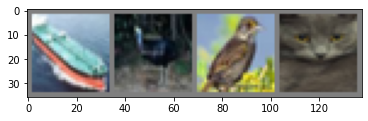

 ship  bird  bird   cat


In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 10)

    def forward(self, x):
        x = (self.fc1(x))
        return x

net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
def net_accuracy(accuracy_on_data, class_acc, net_acc, plt_no):

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in accuracy_on_data:
            images, labels = data
            images = images.view(4, -1)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            c_sum = (predicted == labels).sum().item()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    total_correct = 0
    total_classes = 0
    for i in range(10):
        total_correct += class_correct[i]
        total_classes += class_total[i]
        accuracy_perc = 100 * class_correct[i] / class_total[i]
        #print('Accuracy of %5s : %2d %%' % (
              #classes[i], accuracy_perc))
        class_acc.append(accuracy_perc)

    cnn_accuracy = 100 * total_correct / total_classes
    net_acc.append(cnn_accuracy)
    #print('\nTotal Accuracy @ %1d Epoch = %2d %%' %(epoch+1 , cnn_accuracy))
    
    plt.figure(num=plt_no)
    if accuracy_on_data == testloader:
        plt.title('Classwise Network Accuracy on test data')
    else:
        plt.title('Classwise Network Accuracy on train data')

    plt.plot(list(classes), class_acc, label=('Epoch: %1d' %(epoch+1)))
    # Put a legend to the right of the current axis
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel('Class Name')
    plt.ylabel('Class Accuracy %')

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [09:28<00:00, 47.39s/it]


Finished Training


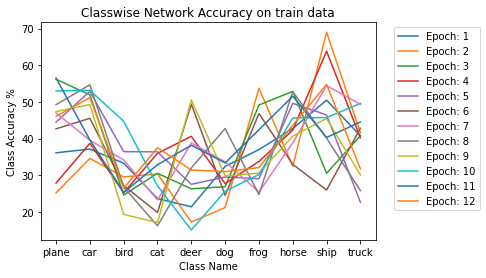

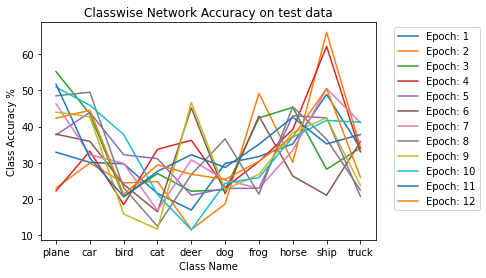

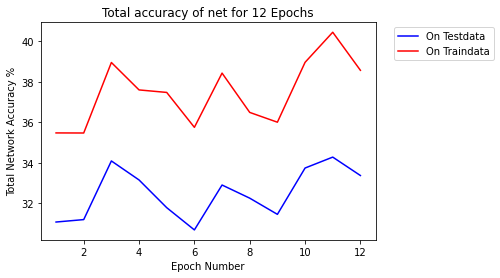

In [14]:
total_net_acc_test = []
total_net_acc_train = []
epoch_list = []

for epoch in tqdm(range(12)):  # loop over the dataset multiple times

    trainset_acc = []
    testset_acc =[]
    epoch_list.append(epoch+1)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data

        inputs = inputs.view(4,-1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %
                  #(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    net_accuracy(trainloader, trainset_acc, total_net_acc_train, 1)
    net_accuracy(testloader, testset_acc, total_net_acc_test, 2)

print('Finished Training')

for i in range(2):
    plt.figure(num=3)
    if i ==0:
        plt.plot(epoch_list, total_net_acc_test, 'b', label='On Testdata')
    else:
        plt.plot(epoch_list, total_net_acc_train, 'r', label='On Traindata')
    plt.title('Total accuracy of net for %1d Epochs' %(len(epoch_list)))
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel('Epoch Number')
    plt.ylabel('Total Network Accuracy %')